Copyright (c) 2017-2020 [Serpent-Tools developer team](https://github.com/CORE-GATECH-GROUP/serpent-tools/graphs/contributors), GTRC

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

# `DepletionReader`

## Basic Operation

This notebook demonstrates the capabilities of the [`serpentTools`](https://github.com/CORE-GATECH-GROUP/serpent-tools) in regards to reading depleted material files. SERPENT [1] produces a [burned material file](http://serpent.vtt.fi/mediawiki/index.php/Description_of_output_files#Burnup_calculation_output), containing the evolution of material properties through burnup for all burned materials present in the problem. 
The `DepletionReader` is capable of reading this file, and storing the data inside `DepletedMaterial` objects.
Each such object has methods and attributes that should ease analysis.

In [1]:
%matplotlib inline
import serpentTools
from serpentTools.settings import rc

In [2]:
depFile = 'demo_dep.m'
dep = serpentTools.readDataFile(depFile)

The materials read in from the file are stored in the `materials` dictionary, where the keys represent the name of specific materials, and the corresponding values are the depleted material.

In [3]:
dep.materials

{'fuel0': <serpentTools.objects.materials.DepletedMaterial at 0x7fc7b5265430>,
 'bglass0': <serpentTools.objects.materials.DepletedMaterial at 0x7fc7c47dbc70>,
 'total': <serpentTools.objects.materials.DepletedMaterial at 0x7fc7c47db5b0>}

Metadata, such as the isotopic vector and depletion schedule are also present on the reader as attributes. 

In [4]:
print(str(dep.names))

['Xe135', 'I135', 'U234', 'U235', 'U236', 'U238', 'Pu238', 'Pu239', 'Pu240', 'Pu241', 'Pu242', 'Np237', 'Am241', 'Am243', 'Cm243', 'Cm244', 'Cm245', 'Cs133', 'Nd143', 'Sm147', 'Sm149', 'Sm150', 'Sm151', 'Sm152', 'Eu153', 'Gd155', 'Mo95', 'Tc99', 'Ru101', 'Rh103', 'Ag109', 'Cd113', 'lost', 'total']


In [5]:
dep.burnup

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
       0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
       0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
       0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
       0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  , 1.02, 1.04, 1.06, 1.08,
       1.1 , 1.12, 1.14, 1.16, 1.18, 1.2 , 1.22, 1.24, 1.26, 1.28, 1.3 ,
       1.32, 1.34, 1.36, 1.38, 1.4 , 1.42])

In [6]:
dep.days

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5,
       11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. ,
       16.5, 17. , 17.5, 18. , 18.5, 19. , 19.5, 20. , 20.5, 21. , 21.5,
       22. , 22.5, 23. , 23.5, 24. , 24.5, 25. , 25.5, 26. , 26.5, 27. ,
       27.5, 28. , 28.5, 29. , 29.5, 30. , 30.5, 31. , 31.5, 32. , 32.5,
       33. , 33.5, 34. , 34.5, 35. , 35.5])

In [7]:
print(str(dep.zais))

[541350, 531350, 922340, 922350, 922360, 922380, 942380, 942390, 942400, 942410, 942420, 932370, 952410, 952430, 962430, 962440, 962450, 551330, 601430, 621470, 621490, 621500, 621510, 621520, 631530, 641550, 420950, 430990, 441010, 451030, 471090, 481130, 666, 0]


## DepletedMaterial
As mentioned before, all the material data is stored inside these `DepletedMaterial` objects. These objects share access to the metadata as well.

In [8]:
fuel = dep.materials['fuel0']
print(fuel.burnup)
assert fuel.days is dep.days

[0.         0.00702676 0.0144405  0.0218803  0.0297245  0.0370823
 0.0447201  0.0513465  0.0590267  0.0671439  0.073392   0.0802637
 0.0887954  0.0974604  0.104807   0.111528   0.119688   0.128006
 0.135704   0.143491   0.150545   0.157608   0.165391   0.172872
 0.180039   0.188011   0.195215   0.202291   0.20963    0.216895
 0.224651   0.232139   0.23904    0.246076   0.25422    0.262011
 0.269681   0.276981   0.284588   0.291835   0.299661   0.30727
 0.314781   0.322364   0.329404   0.336926   0.34438    0.352246
 0.360913   0.367336   0.37415    0.381556   0.388951   0.396286
 0.404159   0.412113   0.419194   0.426587   0.43425    0.442316
 0.449562   0.456538   0.465128   0.472592   0.479882   0.487348
 0.494634   0.502167   0.508326   0.515086   0.522826   0.530643  ]


Materials can also be obtained by indexing directly into the reader like a dictionary

In [9]:
assert dep["fuel0"] is dep.materials["fuel0"] is dep.get("fuel0")

All of the variables present in the depletion file for this material are present, stored in the `data` dictionary. These are also stored as attributes on the reader

In [10]:
fuel.data.keys()

dict_keys(['volume', 'burnup', 'adens', 'mdens', 'a', 'h', 'sf', 'gsrc', 'ingTox', 'inhTox'])

In [11]:
print(fuel.adens)
assert fuel.adens is fuel.data['adens']

[[0.00000e+00 2.43591e-09 4.03796e-09 ... 4.70133e-09 4.70023e-09
  4.88855e-09]
 [0.00000e+00 6.06880e-09 8.11783e-09 ... 8.05991e-09 8.96359e-09
  9.28554e-09]
 [4.48538e-06 4.48486e-06 4.48432e-06 ... 4.44726e-06 4.44668e-06
  4.44611e-06]
 ...
 [0.00000e+00 3.03589e-11 7.38022e-11 ... 1.62829e-09 1.63566e-09
  1.64477e-09]
 [0.00000e+00 1.15541e-14 2.38378e-14 ... 8.60736e-13 8.73669e-13
  8.86782e-13]
 [6.88332e-02 6.88334e-02 6.88336e-02 ... 6.88455e-02 6.88457e-02
  6.88459e-02]]


Similar to the original file, the rows of the matrix correspond to positions in the isotopic vector, and the columns correspond to positions in burnup/day vectors.

In [12]:
print(fuel.mdens.shape)  # rows, columns
print(fuel.burnup.shape)
print(len(fuel.names))

(34, 72)
(72,)
34


## Data Retrieval
At the heart of the `DepletedMaterial` object is the `getValues` method. This method acts as an slicing mechanism that returns data for a select number of isotopes at select points in time. `getValues` requires two arguments for the units of time requested, e.g. `days` or `burnup`, and the name of the data requested. This second value must be a key in the `data` dictionary. 

Specific days or values of burnup can be passed with the `timePoints` keyword. This will instruct the slicing tool to retrieve data that corresponds to values of `days` or `burnup` in the `timePoints` list. By default the method returns data for every time point on the material unless `timePoints` is given. Similarly, one can pass a string or list of strings as the `names` or `zai` argument and obtain data for those specific isotopes. Data for every isotope is given if `names` and `zai` are not given.

In [13]:
dayPoints = [0, 5, 10, 30]
iso = ['Xe135', 'Sm149']
zai = [541350, 621490]
isoVals = fuel.getValues('days', 'a', dayPoints, iso)
print(isoVals)
zaiVals = fuel.getValues('days', 'a', dayPoints, zai=zai)
assert not (zaiVals - isoVals).any()

[[0.00000e+00 3.28067e+14 3.24606e+14 3.27144e+14]
 [0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00]]


The `DepletedMaterial` uses this slicing for the built in `plot` routine. `plot` takes the same slicing arguments as `getValues`, and includes some optional formatting arguments.

By default, the plot method will plot data for all isotopes present, leading to very busy plots. The plots can be cleaned up by passing isotope names or `ZZAAAI` identifiers to the `names` or `zai` arguments, respectively. 

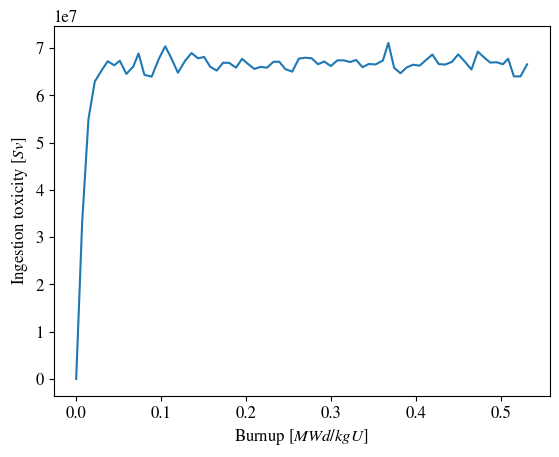

In [14]:
fuel.plot('burnup', 'ingTox', names='Xe135');

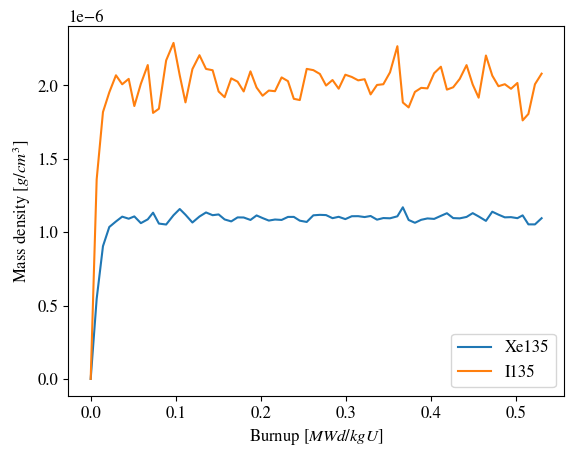

In [15]:
fuel.plot('burnup', 'mdens', zai=[541350, 531350]);

This type of plotting can also be applied to the `DepletedMaterial` level, with similar options for formatting and retrieving data. The materials to be plotted can be filtered using the `materials` argument. The `labelFmt` argument can be used to apply a consistent label to each unique plot. This argument supports [brace-delimited formatting](https://docs.python.org/3/library/stdtypes.html?#str.format), and will automatically replace strings like `{mat}` with the name of the material. The table below contains the special strings and their replacements

|String|Replacement|
|-|-|
|`{mat}`|Name of the material|
|`{iso}`|Name of the isotope, e.g. `'U235'`|
|`{zai}`|ZZAAAI of the isotope, e.g. 922350|

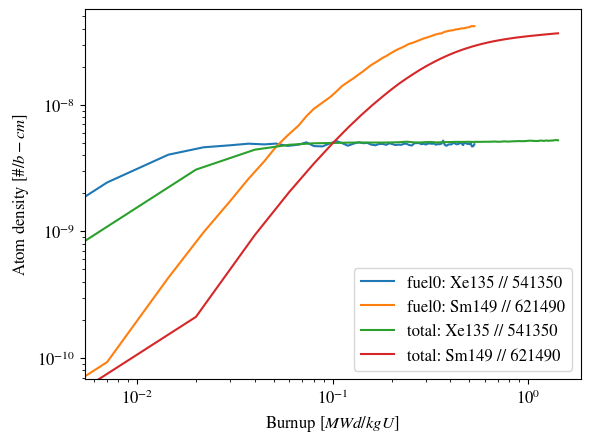

In [16]:
dep.plot('burnup', 'adens', names=iso, 
         materials=['fuel0', 'total'],
         labelFmt="{mat}: {iso} // {zai}", loglog=True);

## Settings
The `DepletionReader` also has a collection of settings to control what data is stored. If none of these settings are modified, the default is to store all the data from the output file.

1. [`depletion.materialVariables`](http://serpent-tools.readthedocs.io/en/latest/settingsTop.html#depletion-materialvariables) - Control what data is stored for each material
1. [`depletion.materials`](http://serpent-tools.readthedocs.io/en/latest/settingsTop.html#depletion-materials) - Control what materials are stored
1. [`depletion.metadataKeys`](http://serpent-tools.readthedocs.io/en/latest/settingsTop.html#depletion-metadatakeys) - Control what non-material data is stored
1. [`depletion.processTotal`](http://serpent-tools.readthedocs.io/en/latest/settingsTop.html#depletion-processtotal) - If `True`, store the block contain data for all depleted materials

Below is an example of configuring a `DepletionReader` that only stores the burnup days, and atomic density for all materials that begin with `bglass` followed by at least one integer.

In [17]:
rc['depletion.processTotal'] = False
rc['depletion.metadataKeys'] = ['BU']
rc['depletion.materialVariables'] = ['ADENS']
rc['depletion.materials'] = [r'bglass\d+']

bgReader= serpentTools.readDataFile(depFile)
bgReader.read()

In [18]:
bgReader.materials.keys()

dict_keys(['bglass0'])

In [19]:
bglass = bgReader.materials['bglass0']
bglass.data.keys()

dict_keys(['adens'])

## Integration with ``pandas.DataFrame``
If you have the [`pandas`](https://pandas.pydata.org/) python package installed, you can use the `DepletedMaterial.toDataFrame` method to export depletion data to a tabular layout. The method will retrieve data for all isotopes unless ``names`` or ``zai`` are given. For compactness, only a few isotopes will be demonstrated here.

In [22]:
fuel.toDataFrame("adens", names=["U235", "Pu239", "Xe135"]).head()

Isotopes,U235,Pu239,Xe135
Time [d],,,
0.0,0.000558,0.000000e+00,0.000000e+00
0.5,0.000558,6.374580e-09,2.435910e-09
1.0,0.000558,2.590310e-08,4.037960e-09
1.5,0.000558,5.728820e-08,4.620920e-09
2.0,0.000557,9.927160e-08,4.789480e-09


Arguments can be used to control the time values in the index and column structure

In [21]:
fuel.toDataFrame("adens", time="burnup", zai=[922350, 541350]).head()

Isotope ZAI,922350,541350
Burnup [MWd/kgU],,
0.000000,0.000558,0.000000e+00
0.007027,0.000558,2.435910e-09
0.014441,0.000558,4.037960e-09
0.021880,0.000558,4.620920e-09
0.029725,0.000557,4.789480e-09


## Conclusion
The `DepletionReader` is capable of reading and storing all the data from the SERPENT burned materials file. Upon reading, the reader creates custom `DepletedMaterial` objects that are responsible for storing and retrieving the data. These objects also have a handy `plot` method for quick analysis. Use of the `rc` settings control object allows increased control over the data selected from the output file.

## References
1. J. Leppänen, M. Pusa, T. Viitanen, V. Valtavirta, and T. Kaltiaisenaho. "The Serpent Monte Carlo code: Status, development and applications in 2013." Ann. Nucl. Energy, [82 (2015) 142-150](https://www.sciencedirect.com/science/article/pii/S0306454914004095)